<a href="https://colab.research.google.com/github/ankur26nashier/image_classification/blob/master/image_code_stub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A code stub for accessing the language dataset:

In [3]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive

drive.mount('/content/drive/')

image_size = 48
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = '/content/drive/My Drive/image-classification-data/image_dataset/'  ## CHANGE TO YOUR OWN DIRECTORY

images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

# Normalizing pixels of image between 0 and 1
images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0

print(images_train.shape)
print(images_val.shape)
print(images_test_public.shape)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
(98479, 48, 48, 3)
(12270, 48, 48, 3)
(11921, 48, 48, 3)


In [2]:
sample = 1
print(images_val[sample])
print(labels_val[sample])
print(files_val[sample])

NameError: ignored

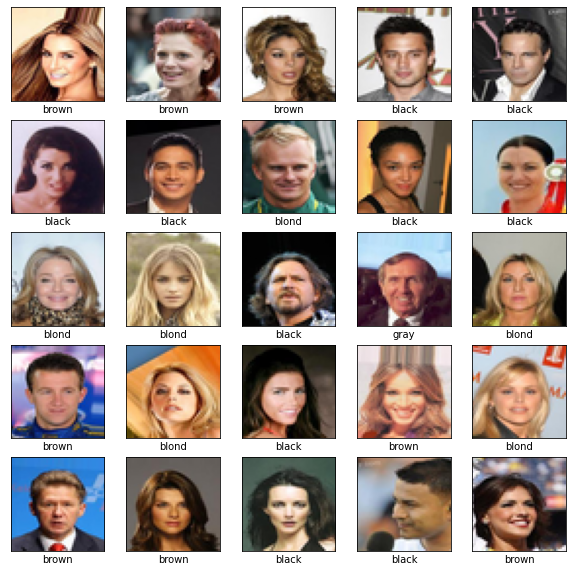

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(hair_colours[labels_train[i]])
plt.show()

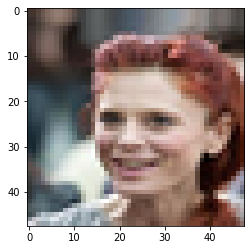

 Label : 2 i.e  brown


In [6]:
# Displaying images
import matplotlib.pyplot as plt

ImageNo=1
image1=plt.imshow(images_train[ImageNo])
plt.show()

print( ' Label :', labels_train[ImageNo], 'i.e ', hair_colours[labels_train[ImageNo] ])

In [0]:
#BUILDING CNN MODEL
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#creating model architecture 
model1=Sequential()

model1.add( Conv2D(48,(5,5), activation='relu', input_shape=(48,48,3) ) )
model1.add( MaxPooling2D( pool_size=(2,2)))

model1.add( Conv2D(48,(5,5), activation='relu') )
model1.add( MaxPooling2D( pool_size=(2,2)))
model1.add( Flatten() )
model1.add( Dense(1000, activation='relu') )
model1.add( Dense(4 , activation='softmax' ))

In [0]:
model1.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
from keras.utils import to_categorical
labels_train_array= to_categorical(labels_train)
labels_val_array= to_categorical(labels_val)

In [21]:
#model without valiadtion split

model_train =model1.fit( images_train, labels_train_array, epochs=10)

Epoch 1/10
98479/98479 [==============================] - 657s 7ms/step - loss: 9.9011 - accuracy: 0.0652
Epoch 2/10
98479/98479 [==============================] - 662s 7ms/step - loss: 9.9042 - accuracy: 0.0652
Epoch 3/10
98479/98479 [==============================] - 667s 7ms/step - loss: 9.9042 - accuracy: 0.0652
Epoch 4/10
98479/98479 [==============================] - 659s 7ms/step - loss: 9.9042 - accuracy: 0.0652
Epoch 5/10
98479/98479 [==============================] - 660s 7ms/step - loss: 9.9042 - accuracy: 0.0652
Epoch 6/10
98479/98479 [==============================] - 659s 7ms/step - loss: 9.9042 - accuracy: 0.0652
Epoch 7/10
98479/98479 [==============================] - 663s 7ms/step - loss: 9.9042 - accuracy: 0.0652
Epoch 8/10
98479/98479 [==============================] - 659s 7ms/step - loss: 9.9042 - accuracy: 0.0652
Epoch 9/10
98479/98479 [==============================] - 660s 7ms/step - loss: 9.9042 - accuracy: 0.0652
Epoch 10/10
98479/98479 [=====================

In [9]:
#model without valiadtion split
model_train =model1.fit( images_train, labels_train_array, epochs=10, validation_split=0.3)

Train on 68935 samples, validate on 29544 samples
Epoch 1/10
68935/68935 [==============================] - 464s 7ms/step - loss: 11.3074 - accuracy: 0.3863 - val_loss: 11.3215 - val_accuracy: 0.3834
Epoch 2/10
68935/68935 [==============================] - 466s 7ms/step - loss: 11.3286 - accuracy: 0.3864 - val_loss: 11.3215 - val_accuracy: 0.3834
Epoch 3/10
68935/68935 [==============================] - 470s 7ms/step - loss: 11.3286 - accuracy: 0.3864 - val_loss: 11.3215 - val_accuracy: 0.3834
Epoch 4/10
68935/68935 [==============================] - 477s 7ms/step - loss: 11.3286 - accuracy: 0.3864 - val_loss: 11.3215 - val_accuracy: 0.3834
Epoch 5/10
68935/68935 [==============================] - 476s 7ms/step - loss: 11.3286 - accuracy: 0.3864 - val_loss: 11.3215 - val_accuracy: 0.3834
Epoch 6/10
68935/68935 [==============================] - 472s 7ms/step - loss: 11.3286 - accuracy: 0.3864 - val_loss: 11.3215 - val_accuracy: 0.3834
Epoch 7/10
68935/68935 [==========================

In [78]:
#model without valiadtion split
model_train =model1.fit( images_train, labels_train_array, epochs=20, validation_split=0.3)

Train on 68935 samples, validate on 29544 samples
Epoch 1/20
68935/68935 [==============================] - 477s 7ms/step - loss: 0.4496 - accuracy: 0.8277 - val_loss: 0.3585 - val_accuracy: 0.8674
Epoch 2/20
68935/68935 [==============================] - 471s 7ms/step - loss: 0.3184 - accuracy: 0.8820 - val_loss: 0.3324 - val_accuracy: 0.8742
Epoch 3/20
68935/68935 [==============================] - 465s 7ms/step - loss: 0.2813 - accuracy: 0.8960 - val_loss: 0.2872 - val_accuracy: 0.8941
Epoch 4/20
68935/68935 [==============================] - 465s 7ms/step - loss: 0.2555 - accuracy: 0.9047 - val_loss: 0.2913 - val_accuracy: 0.8925
Epoch 5/20
68935/68935 [==============================] - 464s 7ms/step - loss: 0.2262 - accuracy: 0.9151 - val_loss: 0.3222 - val_accuracy: 0.8821
Epoch 6/20
68935/68935 [==============================] - 467s 7ms/step - loss: 0.2010 - accuracy: 0.9243 - val_loss: 0.3048 - val_accuracy: 0.8951
Epoch 7/20
68935/68935 [==============================] - 465s

In [11]:
#Evaluate model accuracy
model1.evaluate(images_val,labels_val_array)

12270/12270 [==============================] - 18s 1ms/step


[11.18414541522759, 0.3265688717365265]

In [1]:
#visualising the model accuracy
plt.plot(model1.history())
plt.plot(model1.history['val_acc'])
plot.title('MOdedl Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Trainning','Validation'], loc='upper left')
plt.show()


#visualising the model Loss
plt.plot(model1.history['acc'])
plt.plot(model1.history['val_loss'])
plot.title('MOdedl Accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Trainning','Validation'], loc='upper right')
plt.show()


NameError: ignored

[[ 38.27947  -43.136536  24.275942 -32.5355  ]]

  He/She have  black hairs with probablity  : 38.27947
 He/She have  brown hairs with  second most probablity  : 24.275942


'\n#Resizing image\n\nfrom skimage.transform import resize\nMy_image_resize=resize( images_test_public[i], (48,48,3))\nimage=plt.imshow(My_image_resize)\n'

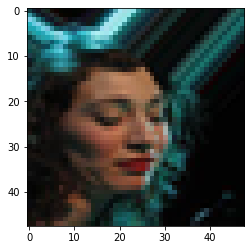

In [53]:
#classifying  loaded data

#images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
i=0
#My_image=plt.imread(images_test_public[i])
image= plt.imshow(images_test_public[i])

#Probablity of each class
import numpy as np
probablities= model1.predict( np.array( [images_test_public[i], ]))

print( probablities)

index=np.argsort(probablities[0,:])
print( '\n  He/She have ',hair_colours[index[3]] , 'hairs with probablity  :',probablities[0,index[3]] )
print( ' He/She have ',hair_colours[index[2]] , 'hairs with  second most probablity  :',probablities[0,index[2]] )

"""
#Resizing image

from skimage.transform import resize
My_image_resize=resize( images_test_public[i], (48,48,3))
image=plt.imshow(My_image_resize)
"""


#from google.colab import files
#uploaded_file=files.upload()
#my_image=plt.imread('uploaded_file_name')


In [0]:
model1.save('my_model1.h5')

In [0]:
weights=model1.save_weights("my_model1_weights.h5")

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
drive2 = GoogleDrive(GoogleAuth())

In [73]:

model_file = drive2.CreateFile({'title' : 'my_model1.h5'})
model_file.SetContentFile('my_model1.h5')
model_file.Upload()

InvalidConfigError: ignored

In [0]:
from keras.models import load_model
model2=load_model('my_model1.h5')
